In [2]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
#reading csv and storing in Data frame
df=pd.read_csv('weatherHistory.csv')
columns=['Formatted Date', 'Apparent Temperature (C)', 'Humidity']

#New data frame with required columns
required_df=df[columns].copy()
required_df[['Date','Time','Excess']]=required_df['Formatted Date'].str.split(expand=True)
required_df=required_df.drop(['Formatted Date', 'Excess'], axis=1)
print(required_df.head())

   Apparent Temperature (C)  Humidity        Date          Time
0                  7.388889      0.89  2006-04-01  00:00:00.000
1                  7.227778      0.86  2006-04-01  01:00:00.000
2                  9.377778      0.89  2006-04-01  02:00:00.000
3                  5.944444      0.83  2006-04-01  03:00:00.000
4                  6.977778      0.83  2006-04-01  04:00:00.000


In [4]:
#groupig by date and find daily avarage
required_df=required_df.groupby(['Date']).mean()
index = required_df.index
required_df=required_df.reset_index();
required_df['Date']=index

In [4]:
required_df.head()

,Date,Apparent Temperature (C),Humidity
0,2006-01-01,-0.447222,0.818333
1,2006-01-02,2.042593,0.844583
2,2006-01-03,0.223843,0.898333
3,2006-01-04,-0.457407,0.905417
4,2006-01-05,0.256481,0.948333


In [5]:
required_df[['yyyy','mm','dd']] = required_df.Date.str.split("-",expand=True,)
required_df=required_df.drop(['Date', 'dd'], axis=1)
required_df.head()



,Apparent Temperature (C),Humidity,yyyy,mm
0,-0.447222,0.818333,2006,01
1,2.042593,0.844583,2006,01
2,0.223843,0.898333,2006,01
3,-0.457407,0.905417,2006,01
4,0.256481,0.948333,2006,01


In [6]:
#finding monthly average

mean_df=required_df.groupby(['mm','yyyy'],as_index=False).mean()
mean_df

,mm,yyyy,Apparent Temperature (C),Humidity
0,01,2006,-4.170818,0.834651
1,01,2007,2.386044,0.813589
2,01,2008,-2.075724,0.819570
3,01,2009,-3.677360,0.867581
4,01,2010,-4.308296,0.875981
5,01,2011,-2.190390,0.922030
6,01,2012,-1.961253,0.797581
7,01,2013,-1.775672,0.883306
8,01,2014,0.247924,0.846371
9,01,2015,-0.782512,0.831384


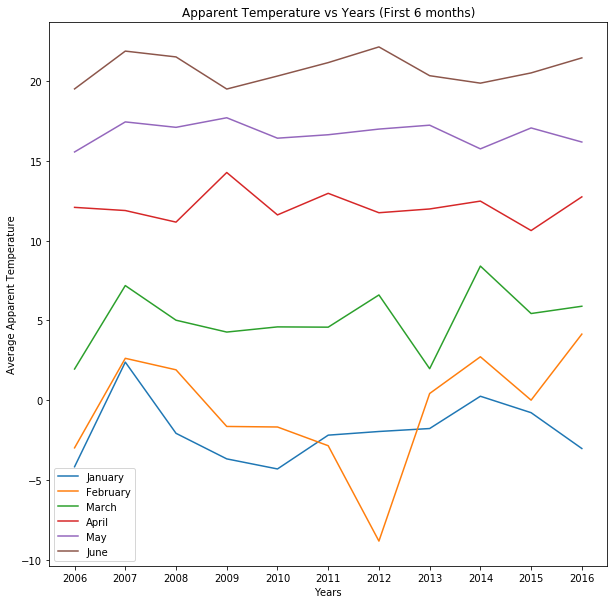

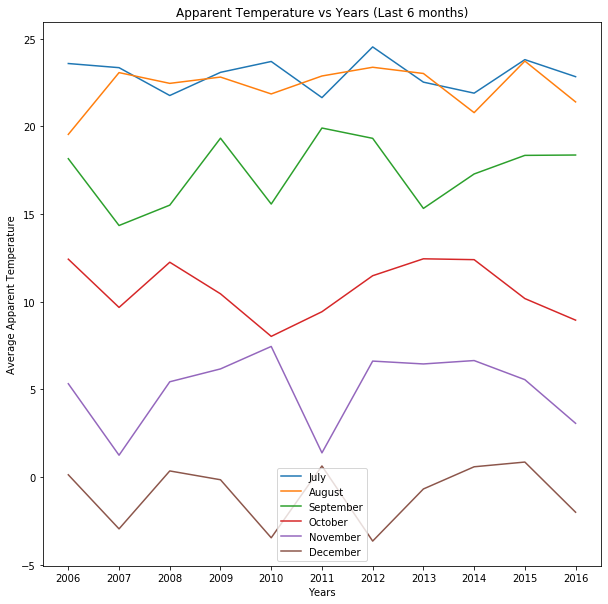

In [7]:

plt.rcParams["figure.figsize"]=10,10
Jan=mean_df[mean_df['mm']=='01']['Apparent Temperature (C)']
Feb=mean_df[mean_df['mm']=='02']['Apparent Temperature (C)']
March=mean_df[mean_df['mm']=='03']['Apparent Temperature (C)']
April=mean_df[mean_df['mm']=='04']['Apparent Temperature (C)']
May=mean_df[mean_df['mm']=='05']['Apparent Temperature (C)']
June=mean_df[mean_df['mm']=='06']['Apparent Temperature (C)']

x=mean_df[mean_df['mm']=='01']['yyyy']
plt.plot(x,Jan,label = "January") 
plt.plot(x,Feb,label='February') 
plt.plot(x,March,label='March') 
plt.plot(x,April,label='April')
plt.plot(x,May,label='May') 

plt.plot(x,June,label='June') 

# naming the x axis 
plt.xlabel('Years') 
# naming the y axis 
plt.ylabel('Average Apparent Temperature') 
  
# giving a title to my graph 
plt.title('Apparent Temperature vs Years (First 6 months)') 
plt.legend() 
# function to show the plot 
plt.show() 
plt.close()



July=mean_df[mean_df['mm']=='07']['Apparent Temperature (C)']
August=mean_df[mean_df['mm']=='08']['Apparent Temperature (C)']
Sept=mean_df[mean_df['mm']=='09']['Apparent Temperature (C)']
Oct=mean_df[mean_df['mm']=='10']['Apparent Temperature (C)']
Nov=mean_df[mean_df['mm']=='11']['Apparent Temperature (C)']
Dec=mean_df[mean_df['mm']=='12']['Apparent Temperature (C)']

plt.plot(x,July,label = "July") 
plt.plot(x,August,label='August') 
plt.plot(x,Sept,label='September') 
plt.plot(x,Oct,label='October')
plt.plot(x,Nov,label='November') 

plt.plot(x,Dec,label='December') 

# naming the x axis 
plt.xlabel('Years') 
# naming the y axis 
plt.ylabel('Average Apparent Temperature') 
  
# giving a title to my graph 
plt.title('Apparent Temperature vs Years (Last 6 months)') 
plt.legend() 
# function to show the plot 
plt.show() 
plt.close()

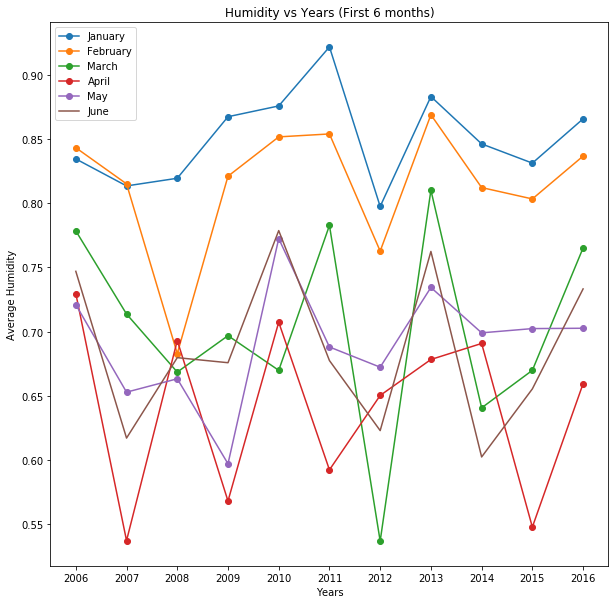

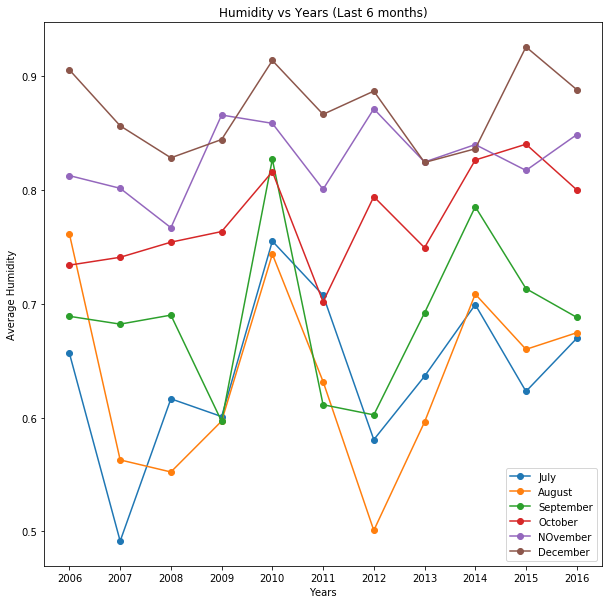

In [8]:
plt.rcParams["figure.figsize"]=10,10
Jan=mean_df[mean_df['mm']=='01']['Humidity']
Feb=mean_df[mean_df['mm']=='02']['Humidity']
March=mean_df[mean_df['mm']=='03']['Humidity']
April=mean_df[mean_df['mm']=='04']['Humidity']
May=mean_df[mean_df['mm']=='05']['Humidity']
June=mean_df[mean_df['mm']=='06']['Humidity']

x=mean_df[mean_df['mm']=='01']['yyyy']
plt.plot(x,Jan,marker='o',label = "January") 
plt.plot(x,Feb,marker='o',label='February') 
plt.plot(x,March,marker='o',label='March') 
plt.plot(x,April,marker='o',label='April')
plt.plot(x,May,marker='o',label='May') 

plt.plot(x,June,label='June') 

# naming the x axis 
plt.xlabel('Years') 
# naming the y axis 
plt.ylabel('Average Humidity') 
  
# giving a title to my graph 
plt.title('Humidity vs Years (First 6 months)') 
plt.legend() 
# function to show the plot 
plt.show() 
plt.close()



July=mean_df[mean_df['mm']=='07']['Humidity']
August=mean_df[mean_df['mm']=='08']['Humidity']
Sept=mean_df[mean_df['mm']=='09']['Humidity']
Oct=mean_df[mean_df['mm']=='10']['Humidity']
Nov=mean_df[mean_df['mm']=='11']['Humidity']
Dec=mean_df[mean_df['mm']=='12']['Humidity']

plt.plot(x,July,marker='o',label = "July") 
plt.plot(x,August,marker='o',label='August') 
plt.plot(x,Sept,marker='o',label='September') 
plt.plot(x,Oct,marker='o',label='October')
plt.plot(x,Nov,marker='o',label='NOvember') 

plt.plot(x,Dec,marker='o',label='December') 

# naming the x axis 
plt.xlabel('Years') 
# naming the y axis 
plt.ylabel('Average Humidity') 
  
# giving a title to my graph 
plt.title('Humidity vs Years (Last 6 months)') 
plt.legend() 
# function to show the plot 
plt.show() 
plt.close()